<a href="https://colab.research.google.com/github/imadonmwinyi/my-classifier/blob/master/my_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os, cv2, itertools
import matplotlib.pyplot as plt 
%matplotlib inline

Using TensorFlow backend.


In [0]:
train_data_dir = '/content/drive/My Drive/plate-and-non-plate-number/train-data/'
test_data_dir ='/content/drive/My Drive/plate-and-non-plate-number/test-data/'
ROWS = 64
COLS = 64
CHANNELS = 3

CREATE A LIST OF PLATE NUMBER IMAGE AND OTHERS


In [0]:
train_img = [train_data_dir+filename for filename in os.listdir(train_data_dir)]
test_img = [test_data_dir+filename for filename in os.listdir(test_data_dir)]
print(test_img)
            

['/content/drive/My Drive/plate-and-non-plate-number/test-data/YEN-214AP.jpg', '/content/drive/My Drive/plate-and-non-plate-number/test-data/SSM-591AJ.jpg', '/content/drive/My Drive/plate-and-non-plate-number/test-data/V01-615FG.PNG', '/content/drive/My Drive/plate-and-non-plate-number/test-data/RSH-398XB.jpg', '/content/drive/My Drive/plate-and-non-plate-number/test-data/SKK-127XB.PNG', '/content/drive/My Drive/plate-and-non-plate-number/test-data/SN-239AL.jpeg', '/content/drive/My Drive/plate-and-non-plate-number/test-data/rose7.jpeg', '/content/drive/My Drive/plate-and-non-plate-number/test-data/rose6.jpeg', '/content/drive/My Drive/plate-and-non-plate-number/test-data/rose5.jpeg', '/content/drive/My Drive/plate-and-non-plate-number/test-data/rose4.jpeg', '/content/drive/My Drive/plate-and-non-plate-number/test-data/rose1.jpeg', '/content/drive/My Drive/plate-and-non-plate-number/test-data/rose2.jpeg', '/content/drive/My Drive/plate-and-non-plate-number/test-data/rock8.jpeg', '/cont

In [0]:
def read_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_COLOR)
    resized_img = cv2.resize(img, (ROWS, COLS), interpolation = cv2.INTER_AREA)
    return resized_img

In [0]:
def prep_data(images):
    m = len(images)
    n_x = ROWS*COLS*CHANNELS
    X = np.ndarray((n_x,m), dtype = np.uint8)
    y = np.zeros((1,m))
    print("X.shape is {}".format(X.shape))
    for i,image_file in enumerate(images):

        image = read_image(image_file)
        print(i, 'done')
        X[:,i] = np.squeeze(image.reshape((n_x,1)))
        fileTrain = image_file.replace('/content/drive/My Drive/plate-and-non-plate-number/train-data/','') 
        fileTest = image_file.replace('/content/drive/My Drive/plate-and-non-plate-number/test-data/','')

        if (fileTest.lower().find('-') | fileTrain.lower().find('-'))>=1:
            y[0,i]=1
        if (fileTest.lower().find('-') |  fileTrain.lower().find('-'))==-1:
            y[0,i]=0
          
       
        if i%100 == 0 :
          
            print("Proceed {} of {}".format(i, m))

    return X,y

In [0]:
X_train, y_train = prep_data(train_img)
X_test, y_test = prep_data(test_img)

In [0]:
y_test



In [0]:
classes = {0: 'Negative_Image',         
          1: 'Plate_Number'}

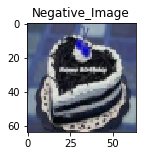

In [0]:
def show_images(X, y, idx) :
        image = X[idx]
        image = image.reshape((ROWS, COLS, CHANNELS))
        plt.figure(figsize=(4,2))
        plt.imshow(image),
        plt.title(classes[y[idx,0]])
        plt.show()
show_images(X_train.T, y_train.T, 20)

In [0]:
classes

In [0]:
from sklearn.linear_model import LogisticRegressionCV

clf = LogisticRegressionCV()
X_train_lr, y_train_lr = X_train.T, y_train.T.ravel()


clf.fit(X_train_lr, y_train_lr)
print("Model accuracy: {:.2f}%".format(clf.score(X_train_lr, y_train_lr)*100))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Model accuracy: 100.00%


In [0]:
from sklearn.neighbors import RadiusNeighborsClassifier

rnc = RadiusNeighborsClassifier()
rnc.fit(plate_img_lr, neg_img_lr)

print("Model accuracy: {:.2f}%".format(rnc.score(plate_img_lr, neg_img_lr)*100))

In [0]:
def show_image_prediction(X, idx, model) :
    image = X[idx].reshape(1,-1)
    image_class = classes[model.predict(image).item()]
    image = image.reshape((ROWS, COLS, CHANNELS))
    plt.figure(figsize = (4,2))
    plt.imshow(image)
    plt.title("Test {} : I think this is {}".format(idx, image_class))
    
    plt.show()

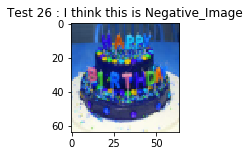

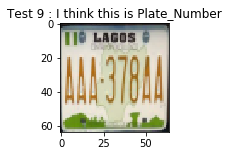

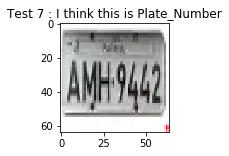

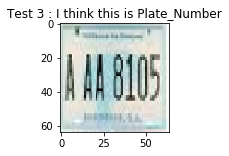

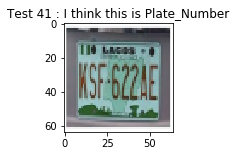

In [0]:
X_test_lr, y_test_lr = X_train.T, y_train.T

for i in np.random.randint(0, len(X_test_lr), 5) :
    show_image_prediction(X_test_lr, i, clf)